**Name:**
1.   Krittin Nisunarat 6280782
2.   Khwanchanok Chaichanayothinwatchara 6280164
3.   Vanessa Rujipatanakul 6280204
4.   Pornkamol Luthra 6280012

### Happiness vs. Corruption

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

### Clean up data

Separate to 2 datasets after cleaning up null value:
1. dataset with social support
2. dataset without social support

**Reason:** some periods of time have different missing values which means that if we drop all 0 value, dataset will remain empty set.

In [2]:
happiness_df = pd.read_csv('WorldHappiness_Corruption_2015_2020.csv')
happiness_df = happiness_df.drop(columns=['family', 'dystopia_residual'])
social_support_df = happiness_df[happiness_df['Year'] > 2016].replace(0, np.nan).dropna()
no_social_support_df = happiness_df.drop(columns=['social_support']).replace(0, np.nan).dropna()

### Find correlation between dataset

In [3]:
def find_coorelation(df):
    corr = df.corr()
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    for column in corr.columns:
        corr[column][column] = 0.0
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return corr

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_58177/953548275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


happiness_score     0.531788
gdp_per_capita      0.357057
health              0.376948
freedom             0.000000
generosity          0.304255
government_trust    0.444022
Year                0.194106
social_support      0.382051
cpi_score           0.456638
Name: freedom, dtype: float64

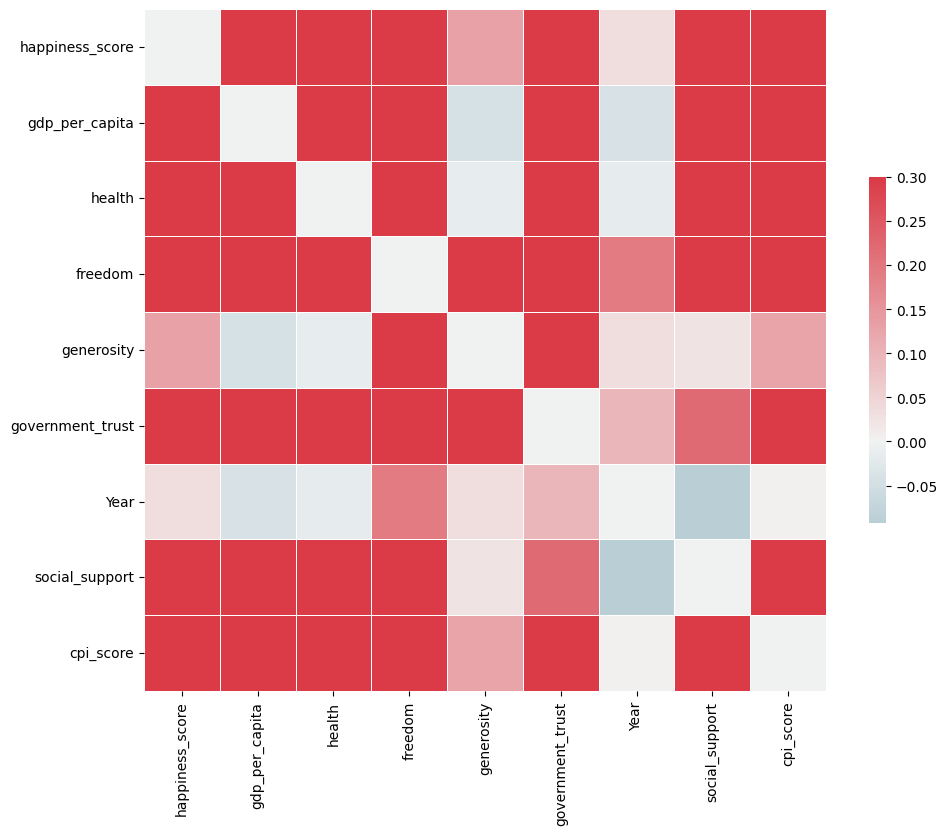

In [4]:
# With social support
find_coorelation(social_support_df)['freedom']

/var/folders/vr/6l9k0t7n045f_gx40s7flt380000gn/T/ipykernel_58177/953548275.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,happiness_score,gdp_per_capita,health,freedom,generosity,government_trust,Year,cpi_score
happiness_score,0.000000,0.795855,0.761863,0.545431,0.153569,0.455927,0.030196,0.690665
gdp_per_capita,0.795855,0.000000,0.772122,0.353552,-0.011118,0.365863,-0.028932,0.703940
health,0.761863,0.772122,0.000000,0.410866,-0.016377,0.325699,0.077540,0.648858
freedom,0.545431,0.353552,0.410866,0.000000,0.291749,0.468122,0.065431,0.487229
generosity,0.153569,-0.011118,-0.016377,0.291749,0.000000,0.280098,-0.106708,0.170834
government_trust,0.455927,0.365863,0.325699,0.468122,0.280098,0.000000,0.023120,0.624193
Year,0.030196,-0.028932,0.077540,0.065431,-0.106708,0.023120,0.000000,0.000397
cpi_score,0.690665,0.703940,0.648858,0.487229,0.170834,0.624193,0.000397,0.000000


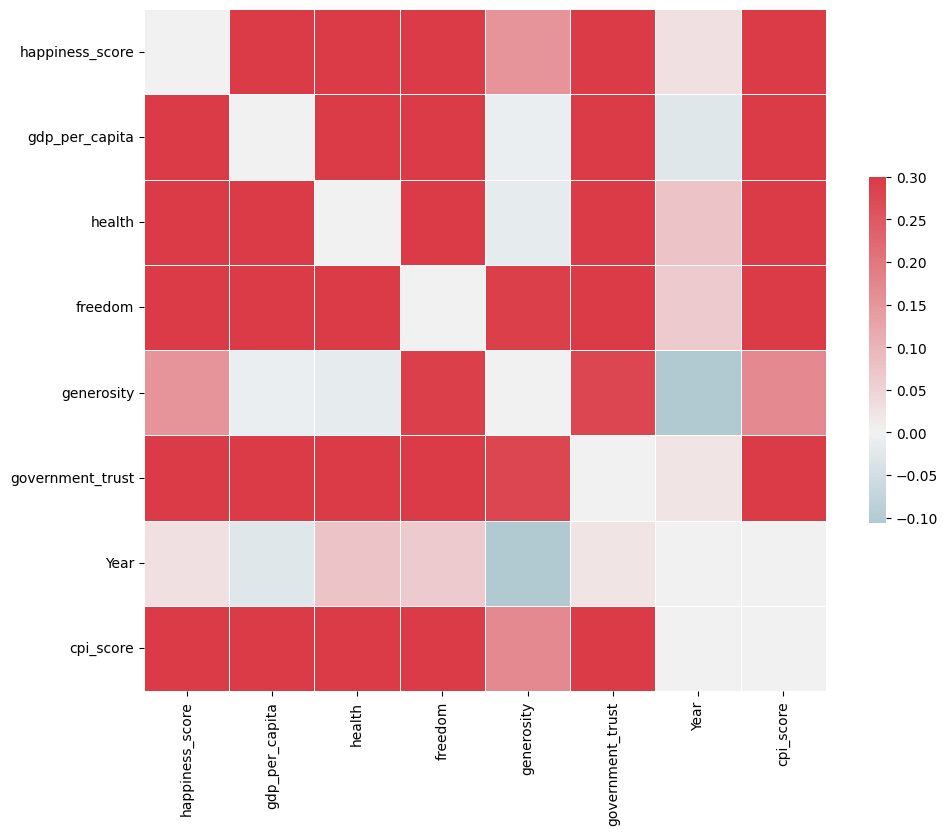

In [5]:
# Without social support
find_coorelation(no_social_support_df)

### 1. Happiness Trend
**Interested Question:** 
- What is the happiness trend of each continent over the years? 
- What will happiness score look like in 2021? 
- Which continent seems to improve at the fastest rate?

### 2. The Happiest of All
**Interested Question:** 
- Overall, what is the happiest continent? 
- Is the happiest country in the happiest continent?

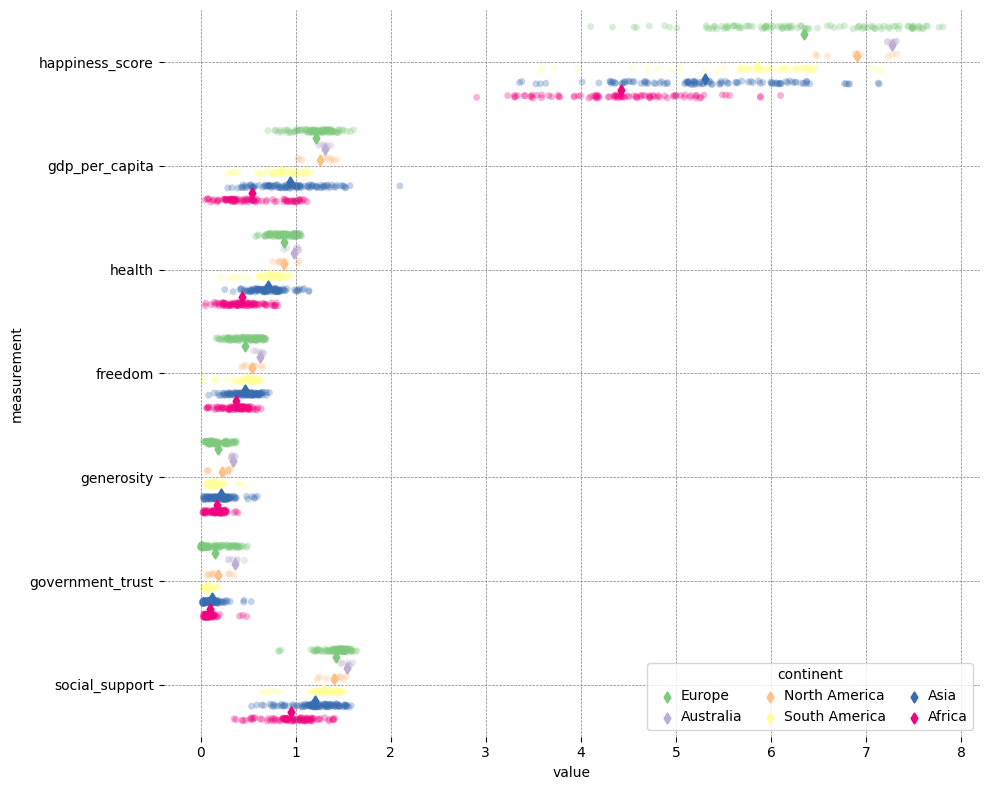

In [59]:
happiness_melted_df = social_support_df.drop(axis=1,columns=['Country', 'cpi_score', 'Year'])
happiness_melted_df = pd.melt(happiness_melted_df, "continent", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(10,8))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
t = sns.stripplot(
    data=happiness_melted_df, x="value", y="measurement", hue="continent",palette="Accent",
    dodge=True, alpha=.3, zorder=1, legend=False
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=happiness_melted_df, x="value", y="measurement", hue="continent",
    join=False, dodge=.8 - .8 / 3, palette="Accent",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)
plt.grid(color='gray', linestyle='--', lw=0.5)
f.tight_layout()

In [52]:
# happiest continent
social_support_df.groupby('continent')['happiness_score'].mean().idxmax()

'Australia'

In [57]:
# happiest country
social_support_df.groupby('Country')['happiness_score'].mean().idxmax()

'Finland'

### 3. GDP Per Capita vs Health
**Interested Question:** How does GDP per capita impact health?

### 4. Freedom vs. Government Trust
**Interested Question:** How does the freedom citizen have affect the trust in government?

### 5. CPI Score vs Government Trust
**Interested Question:** How does each country's cpi score impact citizen's trust in government?

In [6]:
cpi = happiness_df.groupby('Country')['cpi_score'].mean()
gov = happiness_df.groupby('Country')['government_trust'].mean()
continent = happiness_df.groupby('Country')['continent'].max()
cpi_gov_df = pd.concat([cpi, gov, continent], axis=1)

In [7]:
def exponential_curve_fit(x, a, b, c):
    return a*x**2 + b*x + c

fitted_model, _ = curve_fit(exponential_curve_fit,xdata=cpi_gov_df['cpi_score'],ydata=cpi_gov_df['government_trust'])
fitted_model

array([ 1.32196889e-04, -1.02360893e-02,  2.69906524e-01])

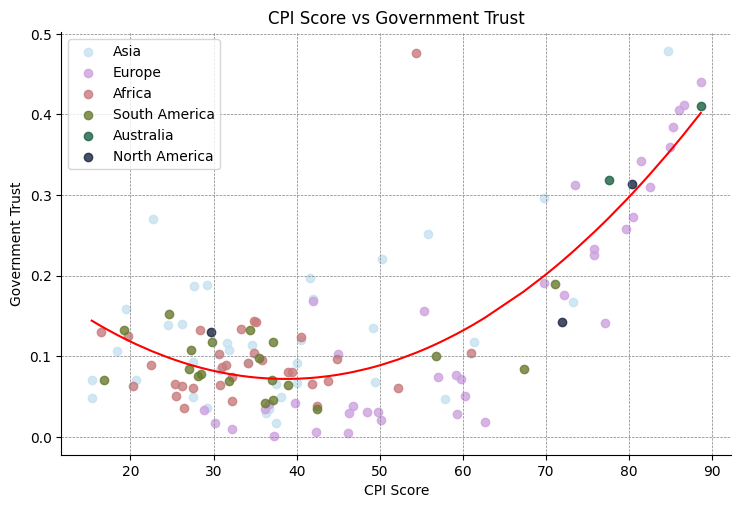

In [10]:
xs = cpi_gov_df['cpi_score'].sort_values()
t = sns.lmplot(data=cpi_gov_df,x='cpi_score', y='government_trust',hue='continent', palette='cubehelix_r',legend=False, fit_reg=False)
sns.lineplot(x=xs, y=exponential_curve_fit(xs, *fitted_model),color='red')
plt.grid(color='gray', linestyle='--', lw=0.5)
plt.xlabel('CPI Score')
plt.ylabel('Government Trust')
plt.title('CPI Score vs Government Trust')
t.fig.set_figwidth(8)